In [3]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
train_df=pd.read_csv("heart.csv")

In [4]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
train_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
out_l = 0
std_o = 3
for i, j in enumerate(train_df.columns):
    if train_df.std()[i] > 0:
        score = (i - train_df.mean()[i]) / train_df.std()[i]  
        if np.abs(score) > std_o:
            out_l = out_l + 1
print(out_l)

12


In [10]:
repl_nan = train_df.mask(train_df.sub(train_df.mean()).div(train_df.std()).abs().gt(3))

In [11]:
repl_nan

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0.0,2.0,1


In [12]:
repl_nan.isnull().sum().sum() 

56

In [13]:
repl_med = repl_nan.fillna(repl_nan.median())

In [14]:
repl_med.isnull().sum().sum()

0

In [16]:
train_df[['fbs', 'target']].groupby(['fbs']).mean()

,target
fbs,
0,0.521789
1,0.464052


In [18]:
train_df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [19]:
train_df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [20]:
train_df.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

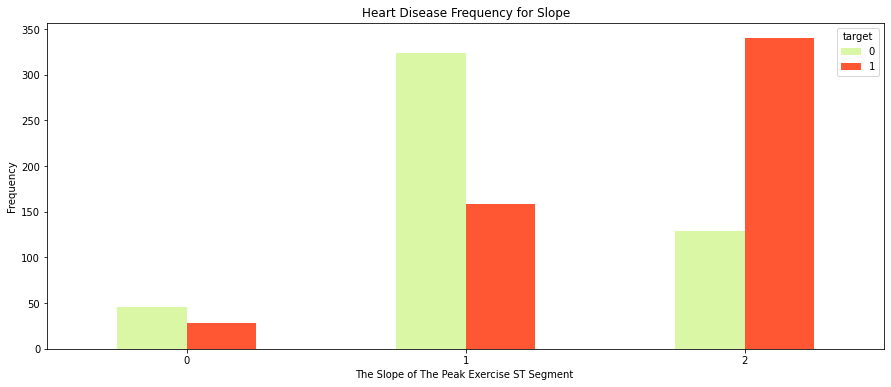

In [22]:
pd.crosstab(train_df.slope,train_df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
pt.title('Heart Disease Frequency for Slope')
pt.xlabel('The Slope of The Peak Exercise ST Segment ')
pt.ylabel('Frequency')
pt.xticks(rotation = 0)
pt.show()

In [23]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
categorical=train_df[["slope","ca","thal"]]

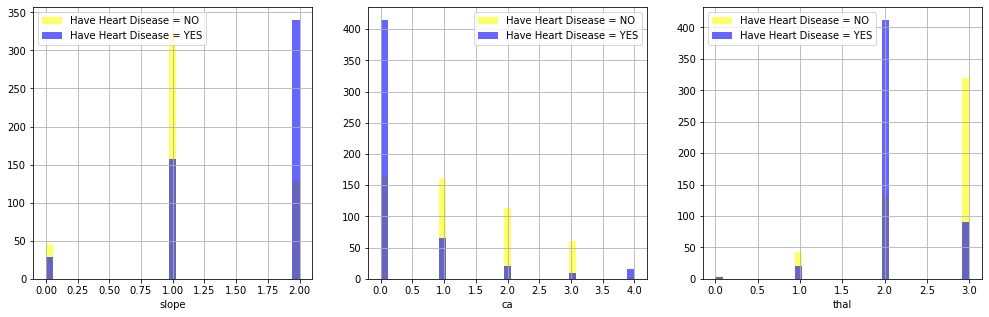

In [25]:
pt.figure(figsize=(17, 17))
for i, column in enumerate(categorical, 1):
    pt.subplot(3, 3, i)
    train_df[train_df["target"] == 0][column].hist(bins=35, color='yellow', label='Have Heart Disease = NO', alpha=0.6)
    train_df[train_df["target"] == 1][column].hist(bins=35, color='blue', label='Have Heart Disease = YES', alpha=0.6)
    pt.legend()
    pt.xlabel(column)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
target=train_df['target']
data = train_df.drop(['target'],axis=1)

In [28]:
data1=train_df.drop(['fbs', 'chol'], axis=1)
target1=train_df['target']
data1 = train_df.drop(['target'],axis=1)

In [29]:
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [30]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
classifierLR=LogisticRegression()
classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8701298701298701

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
classifierNB=MultinomialNB()
classifierNB.fit(x_train,y_train)
classifierNB.score(x_test, y_test)

0.775974025974026

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaussian = round(gaussian.score(x_train,y_train ) * 100, 2)
acc_gaussian

81.59

In [38]:
acc_test_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_test_gaussian

84.42

In [40]:
#data1=train_df.drop(['fbs', 'chol'], axis=1)
target1=train_df['target']
data1 = train_df.drop(['target'],axis=1)

In [41]:
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


x=np.array(training_x)
y=np.array(training_y)

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

In [43]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [44]:
atr = train_df.drop(['target'],axis=1)

In [45]:
atr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [46]:
pre_score = cross_val_score(estimator = GaussianNB(),
                            X = atr, 
                            y = target,
                            scoring = 'accuracy',
                            cv = 10,
                            verbose = 0)

print('Naive-Bayes mean score: %5.3f' %np.mean(pre_score))

Naive-Bayes mean score: 0.821


In [47]:
X = data1.to_numpy()

In [48]:
y = target1.to_numpy()

In [49]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [50]:
X.shape

(1025, 13)

In [51]:
y.shape

(1025,)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [55]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842847 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.840089 (0.050907) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.841947 (0.048783) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.841484 (0.051632) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.840552 (0.051158) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.841015 (0.051404) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.841008 (0.053050) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.840552 (0.049215) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [56]:
preds = grid_search.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
labels=[0,1]
cmx=confusion_matrix(y_test, preds)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds))

[[118  27]
 [ 13 150]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       145
           1       0.85      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



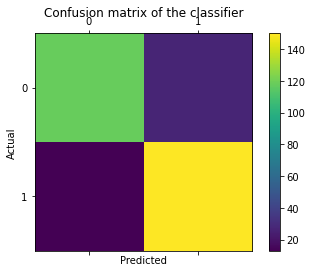

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
#Plotting the validation curve of training and testing scores for max_features
from sklearn.model_selection import validation_curve
param_range= c_values
train_scores, test_scores = validation_curve(
                                LogisticRegression(),
                                X = x_train, y = y_train, 
                                param_name = 'C', 
                                param_range = param_range,cv = cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [60]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

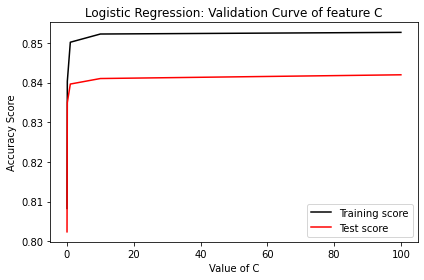

In [61]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="red")

#Create plot
plt.title("Logistic Regression: Validation Curve of feature C")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [62]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=params_NB, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827569 using {'var_smoothing': 6.579332246575683e-05}
0.643401 (0.059358) with: {'var_smoothing': 1.0}
0.646642 (0.059303) with: {'var_smoothing': 0.8111308307896871}
0.652243 (0.059066) with: {'var_smoothing': 0.657933224657568}
0.654101 (0.056637) with: {'var_smoothing': 0.533669923120631}
0.659677 (0.055199) with: {'var_smoothing': 0.43287612810830584}
0.661535 (0.057663) with: {'var_smoothing': 0.3511191734215131}
0.666191 (0.057519) with: {'var_smoothing': 0.2848035868435802}
0.669001 (0.057667) with: {'var_smoothing': 0.23101297000831597}
0.671772 (0.057675) with: {'var_smoothing': 0.1873817422860384}
0.672692 (0.056720) with: {'var_smoothing': 0.15199110829529336}
0.674570 (0.057142) with: {'var_smoothing': 0.12328467394420659}
0.674087 (0.057030) with: {'var_smoothing': 0.1}
0.675959 (0.056656) with: {'var_smoothing': 0.08111308307896872}
0.679206 (0.057208) with: {'var_smoothing': 0.0657933224657568}
0.680125 (0.058130) with: {'var_smoothing': 0.0533669923120631}
0.679

In [63]:
grid_result.best_params_

{'var_smoothing': 6.579332246575683e-05}

In [64]:
preds = grid_search.predict(x_test)

In [65]:
labels=[0,1]
cmx_n=confusion_matrix(y_test, preds,labels)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds))

[[113  32]
 [ 13 150]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       145
           1       0.82      0.92      0.87       163

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



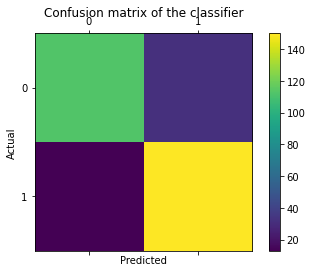

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx_n)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
#Plotting the validation curve of training and testing scores for max_features
from sklearn.model_selection import validation_curve
param_range= np.logspace(0,-9, num=100)
train_scores, test_scores = validation_curve(
                                GaussianNB(),
                                X = x_train, y = y_train, 
                                param_name = 'var_smoothing', 
                                param_range = np.logspace(0,-9, num=100),cv = cv)

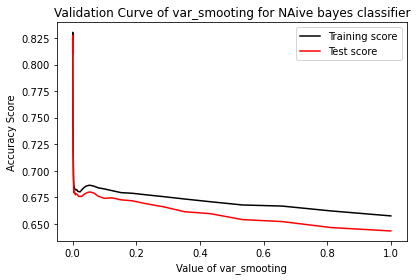

In [73]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="red")

#Create plot
plt.title("Validation Curve of var_smooting for NAive bayes classifier")
plt.xlabel("Value of var_smooting")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [74]:
!pip3 install autokeras

     |████████████████████████████████| 174kB 17.2MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=652d9d2aee2e69b44a1e3eeb4d2ce2c9bcf634348cbcfca56293ab1aa61407af
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=cb88dd51a5b3477bafe4a51488c7158428a8f511c55034d7867991d74072ddbd
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [77]:
import autokeras as ak

clf = ak.StructuredDataClassifier(overwrite = True, max_trials=250)
clf.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100)
results = clf.predict(x_test)
print(clf.evaluate(x_test,y_test))

Trial 143 Complete [00h 00m 19s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 42m 13s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 0.6435 - accuracy: 0.6156 - val_loss: 0.5444 - val_accuracy: 0.8247
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.8142 - val_loss: 0.4560 - val_accuracy: 0.8539
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.8289 - val_loss: 0.3897 - val_accuracy: 0.8701
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4288 - accuracy: 0.8358 - val_loss: 0.3494 - val_accuracy: 0.8896
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3946 - accuracy: 0.8575 - val_loss: 0.3257 - val_accuracy: 0.8929
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3700 - accuracy: 0.8603 - val_loss: 0.3101 - val_accuracy: 0.8961
E

In [78]:
model = clf.export_model()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 13)                0         
_________________________________________________________________
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense (Dense)                (None, 32)                448       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [79]:
labels=[0,1]
cmx_n=confusion_matrix(y_test, results,labels)
print(confusion_matrix(y_test, results))
print(classification_report(y_test,results))

[[145   0]
 [  3 160]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

